In [ ]:
# Some models to train on
MODELS_CONFIG = {
    'ssd_inception_v2': {
        'model_name': 'ssd_inception_v2_coco_2017_11_17',
        'pipeline_file': 'ssd_inception_v2_coco.config',
    },
    'faster_rcnn_inception_v2': {
        'model_name': 'faster_rcnn_inception_v2_coco_2018_01_28',
        'pipeline_file': 'faster_rcnn_inception_v2_pets.config',
    },
    'rfcn_resnet101': {
        'model_name': 'rfcn_resnet101_coco_2018_01_28',
        'pipeline_file': 'rfcn_resnet101_pets.config',
    }
}
selected_model = 'ssd_inception_v2'

In [ ]:
#!pip install lxml tk cython contextlib2 pillow matplotlib pycocotools
!pip install lxml cython contextlib2 pillow matplotlib pycocotools

In [ ]:
!pip install protobuf

In [ ]:
#!apt-get install -qq protobuf-compiler 

In [ ]:
!pip install tensorflow-gpu==1.15

     |████████████████████████████████| 411.5MB 42kB/s 
     |████████████████████████████████| 3.8MB 42.1MB/s 
     |████████████████████████████████| 512kB 47.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=3e79cf5bf1024035f826d64ea54582663be21d1670efcb77caee77130154d245
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling te

In [ ]:
#from __future__ import division, print_function, absolute_import
import pandas as pd
import numpy as np
import csv
import re
import cv2 
import os
import glob
import xml.etree.ElementTree as ET
import io
import tensorflow.compat.v1 as tf
from PIL import Image
from collections import namedtuple, OrderedDict
import shutil
import urllib.request
import tarfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!cp -r "/content/drive/My Drive/cell-data.zip" "cell_detection"

In [ ]:
!unzip cell_detection

Archive:  cell_detection
   creating: cell-data/
   creating: cell-data/train-anno/
  inflating: cell-data/train-anno/BloodImage_00071.xml  
  inflating: cell-data/train-anno/BloodImage_00072.xml  
  inflating: cell-data/train-anno/BloodImage_00073.xml  
  inflating: cell-data/train-anno/BloodImage_00074.xml  
  inflating: cell-data/train-anno/BloodImage_00075.xml  
  inflating: cell-data/train-anno/BloodImage_00076.xml  
  inflating: cell-data/train-anno/BloodImage_00077.xml  
  inflating: cell-data/train-anno/BloodImage_00078.xml  
  inflating: cell-data/train-anno/BloodImage_00079.xml  
  inflating: cell-data/train-anno/BloodImage_00081.xml  
  inflating: cell-data/train-anno/BloodImage_00082.xml  
  inflating: cell-data/train-anno/BloodImage_00083.xml  
  inflating: cell-data/train-anno/BloodImage_00086.xml  
  inflating: cell-data/train-anno/BloodImage_00087.xml  
  inflating: cell-data/train-anno/BloodImage_00088.xml  
  inflating: cell-data/train-anno/BloodImage_00089.xml  
  in

In [ ]:
ls

cell-data/  cell_detection  drive/  sample_data/


In [ ]:
cd cell-data

/content/cell-data


In [ ]:
ls

test-anno/  test-images/  train-anno/  train-images/


In [ ]:
!python xml_to_csv.py -i /content/cell-data/train-anno -o /content/cell-data/train-anno/train_labels.csv

Successfully converted xml to csv.


In [ ]:
!python xml_to_csv.py -i /content/cell-data/test-anno -o /content/cell-data/test-anno/test_labels.csv

Successfully converted xml to csv.


In [ ]:
# Downlaods Tenorflow
%cd /content/cell-data/
!git clone --q https://github.com/tensorflow/models.git

/content/cell-data


In [ ]:
%cd /content/cell-data/models/research
#compiling the proto buffers (not important to understand for this project but you can learn more about them here: https://developers.google.com/protocol-buffers/)
!protoc object_detection/protos/*.proto --python_out=.
# exports the PYTHONPATH environment variable with the reasearch and slim folders' paths
os.environ['PYTHONPATH'] += ':/content/gun_detection/models/research/:/content/gun_detection/models/research/slim/'

/content/cell-data/models/research
object_detection/protos/input_reader.proto: warning: Import object_detection/protos/image_resizer.proto but not used.


In [ ]:
!pip install tf-slim

     |████████████████████████████████| 358kB 8.3MB/s 


In [ ]:
!pip install .

Processing /content/cell-data/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1272111 sha256=576f80d3a53d0f6d50736025ebe41e4d79f9e7095a15ddef6518881c36429973
  Stored in directory: /tmp/pip-ephem-wheel-cache-qvt1kr5c/wheels/08/40/a8/55257e6500985cc199996d35b49fdcf901f64838c55f5d3f4a
Successfully built object-detection


In [ ]:
!python /content/cell-data/generate_tfrecord.py --label0=RBC --label1=WBC --label2=Platelets --csv_input=/content/cell-data/train-anno/train_labels.csv --output_path=/content/cell-data/train-anno/train.record --img_path=/content/cell-data/train-images



W0701 05:47:30.916626 140363152480128 module_wrapper.py:139] From /content/cell-data/generate_tfrecord.py:104: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0701 05:47:31.024386 140363152480128 module_wrapper.py:139] From /content/cell-data/generate_tfrecord.py:62: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/cell-data/train-anno/train.record


In [ ]:
!python /content/cell-data/generate_tfrecord.py --label0=RBC --label1=WBC --label2=Platelets --csv_input=/content/cell-data/test-anno/test_labels.csv --output_path=/content/cell-data/test-anno/test.record --img_path=/content/cell-data/test-images



W0701 05:47:38.116404 140036497151872 module_wrapper.py:139] From /content/cell-data/generate_tfrecord.py:104: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0701 05:47:38.144622 140036497151872 module_wrapper.py:139] From /content/cell-data/generate_tfrecord.py:62: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/cell-data/test-anno/test.record


## Downloading the Base Model
1. Based on the model selecting at the top of this notebook, downloading the model selected and extracting its content.
2. Creating a dir to save the model while training.

In [ ]:
%cd /content/cell-data/models/research

# Name of the object detection model to use.
MODEL = MODELS_CONFIG[selected_model]['model_name']

# Name of the pipline file in tensorflow object detection API.
pipeline_file = MODELS_CONFIG[selected_model]['pipeline_file']

#selecting the model
MODEL_FILE = MODEL + '.tar.gz'

#creating the downlaod link for the model selected
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

#the distination folder where the model will be saved
fine_tune_dir = '/content/cell-data/models/research/pretrained_model'

#checks if the model has already been downloaded
if not (os.path.exists(MODEL_FILE)):
    urllib.request.urlretrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

#unzipping the file and extracting its content
tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()

# creating an output file to save the model while training
os.remove(MODEL_FILE)
if (os.path.exists(fine_tune_dir)):
    shutil.rmtree(fine_tune_dir)
os.rename(MODEL, fine_tune_dir)

/content/cell-data/models/research


In [ ]:
#checking the content of the pretrained model.
# this is the directory of the "fine_tune_checkpoint" that is used in the config file.
!echo {fine_tune_dir}
!ls -alh {fine_tune_dir}

/content/cell-data/models/research/pretrained_model
total 197M
drwxr-x---  3 275875 5000 4.0K Nov 18  2017 .
drwxr-xr-x 63 root   root 4.0K Jul  1 05:48 ..
-rw-r-----  1 275875 5000   77 Nov 18  2017 checkpoint
-rw-r-----  1 275875 5000  98M Nov 18  2017 frozen_inference_graph.pb
-rw-r-----  1 275875 5000  96M Nov 18  2017 model.ckpt.data-00000-of-00001
-rw-r-----  1 275875 5000  18K Nov 18  2017 model.ckpt.index
-rw-r-----  1 275875 5000 3.6M Nov 18  2017 model.ckpt.meta
drwxr-x---  3 275875 5000 4.0K Nov 18  2017 saved_model


## Configuring the Training Pipeline
1. Adding the path for the TFRecords files and pbtxt,batch_size,num_steps,num_classes to the configuration file.
2. Adding some Image augmentation.
3. Creating a directory to save the model at each checkpoint while training. 

In [ ]:
#the path to the folder containing all the sample config files
CONFIG_BASE = "/content/cell-data/models/research/object_detection/samples/configs/"
#path to the specified model's config file
model_pipline = os.path.join(CONFIG_BASE, pipeline_file)
model_pipline

'/content/cell-data/models/research/object_detection/samples/configs/ssd_inception_v2_coco.config'

In [ ]:
#check the sample config file that is provided by the tf model
#!cat /content/gun_detection/models/research/object_detection/samples/configs/ssd_inception_v2_coco.config

In [ ]:
#editing the configuration file to add the path for the TFRecords files, pbtxt,batch_size,num_steps,num_classes.
# any image augmentation, hyperparemeter tunning (drop out, batch normalization... etc) would be editted here

%%writefile {model_pipline}

model {
  ssd {
    num_classes: 3
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    anchor_generator {
      ssd_anchor_generator {
        num_layers: 6
        min_scale: 0.2
        max_scale: 0.95
        aspect_ratios: 1.0
        aspect_ratios: 2.0
        aspect_ratios: 0.5
        aspect_ratios: 3.0
        aspect_ratios: 0.3333
        reduce_boxes_in_lowest_layer: true
      }
    }
    image_resizer {
      fixed_shape_resizer {
        height: 300
        width: 300
      }
    }
    box_predictor {
      convolutional_box_predictor {
        min_depth: 0
        max_depth: 0
        num_layers_before_predictor: 0
        use_dropout: false
        dropout_keep_probability: 0.8
        kernel_size: 3
        box_code_size: 4
        apply_sigmoid_to_scores: false
        conv_hyperparams {
          activation: RELU_6,
          regularizer {
            l2_regularizer {
              weight: 0.00004
            }
          }
          initializer {
            truncated_normal_initializer {
              stddev: 0.03
              mean: 0.0
            }
          }
        }
      }
    }
    feature_extractor {
      type: 'ssd_inception_v2'
      min_depth: 16
      depth_multiplier: 1.0
      conv_hyperparams {
        activation: RELU_6,
        regularizer {
          l2_regularizer {
            weight: 0.00004
          }
        }
        initializer {
          truncated_normal_initializer {
            stddev: 0.03
            mean: 0.0
          }
        }
        batch_norm {
          train: true,
          scale: true,
          center: true,
          decay: 0.9997,
          epsilon: 0.001,
        }
      }
      override_base_feature_extractor_hyperparams: true
    }
    loss {
      classification_loss {
        weighted_sigmoid {
        }
      }
      localization_loss {
        weighted_smooth_l1 {
        }
      }
      hard_example_miner {
        num_hard_examples: 3000
        iou_threshold: 0.99
        loss_type: CLASSIFICATION
        max_negatives_per_positive: 3
        min_negatives_per_image: 0
      }
      classification_weight: 1.0
      localization_weight: 1.0
    }
    normalize_loss_by_num_matches: true
    post_processing {
      batch_non_max_suppression {
        score_threshold: 1e-8
        iou_threshold: 0.6
        max_detections_per_class: 100
        max_total_detections: 100
      }
      score_converter: SIGMOID
    }
  }
}

train_config: {
  batch_size: 24
  optimizer {
    rms_prop_optimizer: {
      learning_rate: {
        exponential_decay_learning_rate {
          initial_learning_rate: 0.004
          decay_steps: 800720
          decay_factor: 0.95
        }
      }
      momentum_optimizer_value: 0.9
      decay: 0.9
      epsilon: 1.0
    }
  }
  fine_tune_checkpoint: "/content/cell-data/models/research/pretrained_model/model.ckpt"
  from_detection_checkpoint: true
  # Note: The below line limits the training process to 200K steps, which we
  # empirically found to be sufficient enough to train the pets dataset. This
  # effectively bypasses the learning rate schedule (the learning rate will
  # never decay). Remove the below line to train indefinitely.
  num_steps: 4000
  data_augmentation_options {
    random_horizontal_flip {
    }
  }
  data_augmentation_options {
    ssd_random_crop {
    }
  }
}

train_input_reader: {
  tf_record_input_reader {
    input_path: "/content/cell-data/train-anno/train.record"
  }
  label_map_path: "/content/cell-data/label_map.pbtxt"
}

eval_config: {
  num_examples: 20000
  # Note: The below line limits the evaluation process to 10 evaluations.
  # Remove the below line to evaluate indefinitely.
  max_evals: 10
}

eval_input_reader: {
  tf_record_input_reader {
    input_path: "/content/cell-data/test-anno/test.record"
  }
  label_map_path: "/content/cell-data/label_map.pbtxt"
  shuffle: false
  num_readers: 1
}

Overwriting /content/cell-data/models/research/object_detection/samples/configs/ssd_inception_v2_coco.config


In [ ]:
# where the model will be saved at each checkpoint while training 
model_dir = 'training/'

# Optionally: remove content in output model directory to fresh start.
!rm -rf {model_dir}
os.makedirs(model_dir, exist_ok=True)

In [ ]:
!pip install -U numpy==1.17.0

     |████████████████████████████████| 20.4MB 155kB/s 
ERROR: tensorflow 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


In [ ]:
pwd

'/content/cell-data/models/research'

In [ ]:
cd slim

/content/cell-data/models/research/slim


In [ ]:
!python setup.py build

running build
running build_py
creating build
creating build/lib
creating build/lib/nets
copying nets/overfeat.py -> build/lib/nets
copying nets/resnet_v2.py -> build/lib/nets
copying nets/mobilenet_v1_test.py -> build/lib/nets
copying nets/vgg.py -> build/lib/nets
copying nets/resnet_v2_test.py -> build/lib/nets
copying nets/inception_utils.py -> build/lib/nets
copying nets/pix2pix_test.py -> build/lib/nets
copying nets/lenet.py -> build/lib/nets
copying nets/nets_factory.py -> build/lib/nets
copying nets/resnet_v1.py -> build/lib/nets
copying nets/dcgan.py -> build/lib/nets
copying nets/overfeat_test.py -> build/lib/nets
copying nets/mobilenet_v1_train.py -> build/lib/nets
copying nets/i3d_utils.py -> build/lib/nets
copying nets/i3d.py -> build/lib/nets
copying nets/dcgan_test.py -> build/lib/nets
copying nets/inception.py -> build/lib/nets
copying nets/cyclegan_test.py -> build/lib/nets
copying nets/vgg_test.py -> build/lib/nets
copying nets/inception_v2_test.py -> build/lib/nets
co

In [ ]:
!python setup.py install

running install
running bdist_egg
running egg_info
writing slim.egg-info/PKG-INFO
writing dependency_links to slim.egg-info/dependency_links.txt
writing requirements to slim.egg-info/requires.txt
writing top-level names to slim.egg-info/top_level.txt
writing manifest file 'slim.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/nets
copying build/lib/nets/overfeat.py -> build/bdist.linux-x86_64/egg/nets
copying build/lib/nets/resnet_v2.py -> build/bdist.linux-x86_64/egg/nets
copying build/lib/nets/mobilenet_v1_test.py -> build/bdist.linux-x86_64/egg/nets
copying build/lib/nets/vgg.py -> build/bdist.linux-x86_64/egg/nets
copying build/lib/nets/resnet_v2_test.py -> build/bdist.linux-x86_64/egg/nets
copying build/lib/nets/inception_utils.py -> build/bdist.linux-x86_64/egg/nets
copying build/lib/nets/pix2pix_test.py ->

In [ ]:
cd ..

/content/cell-data/models/research


In [ ]:
!python3 /content/cell-data/models/research/object_detection/model_main.py \
    --pipeline_config_path={model_pipline}\
    --model_dir={model_dir} \
    --alsologtostderr \

W0701 05:51:31.005746 140357201536896 model_lib.py:717] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting train_steps: None
I0701 05:51:31.005946 140357201536896 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0701 05:51:31.006046 140357201536896 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1
I0701 05:51:31.006144 140357201536896 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: 1
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0701 05:51:31.006228 140357201536896 config_util.py:552] Maybe overwriting eval_num_epochs: 1
INFO:tensorflow:Maybe overwriting load_pretrained: True
I0701 05:51:31.006299 140357201536896 config_util.py:552] Maybe overwriting load_pretrained: True
INFO:tensorflow:Ignoring config override key: load_pretrained
I0701 05:51:31.006369 140357201536896 config_util.py:5

In [ ]:
#the location where the exported model will be saved in.
output_directory = '/content/cell-data/models/research/fine_tuned_model'

# goes through the model is the training/ dir and gets the last one.
# you could choose a specfic one instead of the last
lst = os.listdir(model_dir)
lst = [l for l in lst if 'model.ckpt-' in l and '.meta' in l]
steps=np.array([int(re.findall('\d+', l)[0]) for l in lst])
last_model = lst[steps.argmax()].replace('.meta', '')
last_model_path = os.path.join(model_dir, last_model)
print(last_model_path)

#exports the model specifed and inference graph
!python /content/cell-data/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path={model_pipline} \
    --output_directory={output_directory} \
    --trained_checkpoint_prefix={last_model_path}

training/model.ckpt-4000
Instructions for updating:
Please use `layer.__call__` method instead.
W0701 06:34:49.989151 140579235063680 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tf_slim/layers/layers.py:2802: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0701 06:34:52.614244 140579235063680 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0701 06:34:52.651007 140579235063680 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0701 06:34:52.687199 140579235063680 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:dept

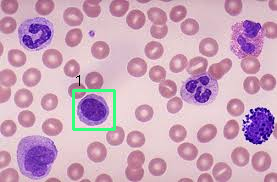

-1

In [39]:
import numpy as np
import tensorflow as tf
import cv2 as cv
from google.colab.patches import cv2_imshow

# Read the graph.
with tf.gfile.FastGFile(output_directory + '/frozen_inference_graph.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())

with tf.Session() as sess:
    # Restore session
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')

    # Read and preprocess an image.
    img = cv.imread('/content/cell.jpg')
    rows = img.shape[0]
    cols = img.shape[1]
    inp = cv.resize(img, (300, 300))
    inp = inp[:, :, [2, 1, 0]]  # BGR2RGB

    # Run the model
    out = sess.run([sess.graph.get_tensor_by_name('num_detections:0'),
                    sess.graph.get_tensor_by_name('detection_scores:0'),
                    sess.graph.get_tensor_by_name('detection_boxes:0'),
                    sess.graph.get_tensor_by_name('detection_classes:0')],
                   feed_dict={'image_tensor:0': inp.reshape(1, inp.shape[0], inp.shape[1], 3)})

    # Visualize detected bounding boxes.
    num_detections = int(out[0][0])
    for i in range(num_detections):
        classId = int(out[3][0][i])
        score = float(out[1][0][i])
        bbox = [float(v) for v in out[2][0][i]]
        if score > 0.3:
            x = bbox[1] * cols
            y = bbox[0] * rows
            right = bbox[3] * cols
            bottom = bbox[2] * rows
            cv.rectangle(img, (int(x), int(y)), (int(right), int(bottom)), (125, 255, 51), thickness=2)
            text = "{}".format(classId)
            cv.putText(img,text, (int(x), (int(y)-5)), cv.FONT_HERSHEY_SIMPLEX, 0.5, 2)

cv2_imshow(img)
cv.waitKey()